<font size=6>Développer une preuve de concept</font>  
<font size=5>Classification d'image avec le papier Learning What and Where to Transfer  
Annexe : Graphiques pour le rapport</font>



---

**Vérification de l'environnement**

In [1]:
import sys
IN_COLAB = "google.colab" in sys.modules
# PATH_DRIVE : to change according to your Google Drive folders
PATH_DRIVE = "/content/drive/My Drive/MachineLearning/ML07"
# IMAGES_DRIVE : to get access to previously loaded images
IMAGES_DRIVE = "/content/drive/My Drive/MachineLearning/ML06/Images"

In [2]:
if IN_COLAB:
    print("Le notebook est exécuté sur Google Colab")
else:
    print("Le notebook est exécuté en local")

Le notebook est exécuté sur Google Colab


In [3]:
if IN_COLAB:
    from google.colab import drive, files
    drive.mount("/content/drive")

Mounted at /content/drive


---
## <font color=blue>Notebook set-up</font>

**Importation des librairies**

In [4]:
import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

In [6]:
if IN_COLAB:
    sys.path.append(PATH_DRIVE)
    os.chdir(PATH_DRIVE)
    import sf_graphiques as sfg
else:
    import modules_perso.sf_graphiques as sfg

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Notebook set-up**

In [7]:
def save_fig(fig_id, tight_layout=False, fig_extension="png", resolution=300):
    path = fig_id + "." + fig_extension
    if IN_COLAB:
        path = PATH_DRIVE + "/" + path
    #print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, dpi=resolution)

In [16]:
def graph_analysis_both(graph_title, historybase, historymethod, labelbase, labelmethod,
                        figsize=(12, 8), only_accuracy=False, es_patience=20,
                        ymin_acc=None, ymax_loss=None):
    baseline_acc = historybase["validation_accuracy"]
    method_acc = historymethod["validation_accuracy"]
    baseline_loss = historybase["validation_loss"]
    method_loss = historymethod["validation_loss"]
    epoch_max = max(len(baseline_acc), len(method_acc))
    epochs_range = np.arange(epoch_max)

    if only_accuracy:
        graph = sfg.MyGraph(graph_title, figsize=figsize)
    else:
        graph = sfg.MyGraph(graph_title, nblin=1, nbcol=2, figsize=figsize)
    graph.add_plot(np.arange(len(baseline_acc))+1, baseline_acc, label=labelbase,
                   multi_index=1)
    graph.add_plot(np.arange(len(method_acc))+1, method_acc, label=labelmethod,
                  subtitle="Validation Accuracy", legend=True,
                  with_grid="both", grid_style=":", multi_index=1)
    graph.set_axe_y(tick_min=ymin_acc, tick_labels_format=":.2%", multi_index=1)
    graph.set_legend(loc="lower right", multi_index=1)
    if es_patience > 0:
        ymin, ymax = graph.ax[0].get_ylim()
        idx_ref = len(baseline_acc) - es_patience
        graph.add_fleches(idx_ref, ymax, 0, baseline_acc[idx_ref-1]-ymax,
                          units='xy', color="dimgrey", multi_index=1)
        idx_ref = len(method_acc) - es_patience
        graph.add_fleches(idx_ref, ymax, 0, method_acc[idx_ref-1]-ymax,
                          units='xy', color="dimgrey", multi_index=1)
    if only_accuracy:
        graph.set_axe_x(label="Epoques", label_position=(0.5, 0.5),
                        tick_min=1, tick_max=epoch_max, multi_index=1)
    else:
        graph.set_axe_x(label="Epoques", label_position=(1.1, 0.5),
                        tick_min=1, tick_max=epoch_max, multi_index=1)
        graph.add_plot(np.arange(len(baseline_acc))+1, baseline_loss, label=labelbase,
                      multi_index=2)
        graph.add_plot(np.arange(len(method_acc))+1, method_loss, label=labelmethod,
                      subtitle="Validation Loss", legend=True,
                      with_grid="both", grid_style=":", multi_index=2)
        graph.set_axe_x(tick_min=1, tick_max=epoch_max, multi_index=2)
        graph.set_axe_y(tick_max=ymax_loss, tick_labels_format=":.2f", multi_index=2)
        graph.set_legend(loc="upper right", multi_index=2)
        if es_patience > 0:
            ymin, ymax = graph.ax[1].get_ylim()
            idx_ref = len(baseline_acc) - es_patience
            graph.add_fleches(idx_ref, ymax, 0, baseline_loss[idx_ref-1]-ymax,
                              units='xy', color="dimgrey", multi_index=2)
            idx_ref = len(method_acc) - es_patience
            graph.add_fleches(idx_ref, ymax, 0, method_loss[idx_ref-1]-ymax,
                              units='xy', color="dimgrey", multi_index=2)
    return graph.fig, graph.ax

---
## 1\. Performance obtenue avec le CNN très simple

In [ ]:
hist_baseline = pd.read_csv("logs/baseline_model.csv")
hist_baseline["validation_loss"] = \
    [float(vl[7: vl.find(", device")]) for vl in hist_baseline.validation_loss]
hist_baseline = hist_baseline.iloc[:-30]
hist_baseline.head()

,epoch,validation_loss,training_loss,validation_accuracy,training_accuracy
0,0,4.7960,4.950792,0.015442,0.006392
1,1,4.7859,4.785742,0.009315,0.011887
2,2,4.7778,4.787785,0.010517,0.011887
3,3,4.7702,4.771534,0.011118,0.002131
4,4,4.7638,4.758773,0.015325,0.018279


In [ ]:
hist_method = pd.read_csv("logs/effb4_to_mycnn_mini.csv")
hist_method["validation_loss"] = \
    [float(vl[7: vl.find(", device")]) for vl in hist_method.validation_loss]
hist_method["training_loss"] = \
    [float(vl[7: vl.find(", device")]) for vl in hist_method.training_loss]
hist_method.head()

,epoch,validation_loss,training_loss,validation_accuracy,training_accuracy
0,0,5.3541,5.3340,0.007585,0.007576
1,1,5.3707,5.3475,0.007585,0.008586
2,2,4.9459,4.9365,0.011226,0.007576
3,3,4.8586,4.8554,0.009102,0.009091
4,4,4.8224,4.8208,0.010619,0.010606


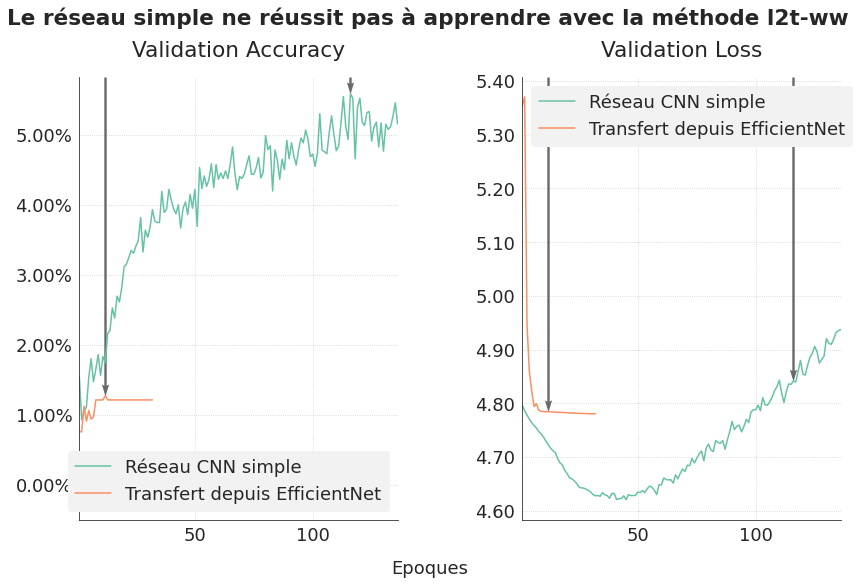

In [ ]:
fig, ax = graph_analysis_both("Le réseau simple ne réussit pas à apprendre avec la méthode l2t-ww",
                              hist_baseline, hist_method,
                              "Réseau CNN simple", "Transfert depuis EfficientNet",
                              ymin_acc=-0.005)
save_fig("Graph_reseau_simple")
plt.show()

---
## 2\. Performance obtenue avec VGG16_bn

In [9]:
hist_baseline = pd.read_csv("logs/vgg16bn_120_sgd.csv")
hist_baseline["validation_loss"] = \
    [float(vl[7: vl.find(", device")]) for vl in hist_baseline.validation_loss]
hist_baseline.head()

,epoch,validation_loss,training_loss,validation_accuracy,training_accuracy
0,0,4.7547,4.781000,0.056061,0.019110
1,1,4.7074,4.729261,0.134873,0.096570
2,2,4.6594,4.672583,0.179044,0.178219
3,3,4.6123,4.616797,0.203383,0.231830
4,4,4.5661,4.562226,0.226305,0.279762


In [10]:
hist_method = pd.read_csv("logs/effb4_to_vggbn_trained_mini.csv")
hist_method["validation_loss"] = \
    [float(vl[7: vl.find(", device")]) for vl in hist_method.validation_loss]
hist_method["training_loss"] = \
    [float(vl[7: vl.find(", device")]) for vl in hist_method.training_loss]
hist_method.head()

,epoch,validation_loss,training_loss,validation_accuracy,training_accuracy
0,0,6.3888,5.7749,0.016383,0.025000
1,1,6.0115,4.9844,0.022755,0.062879
2,2,6.1288,4.5710,0.033981,0.098232
3,3,6.4567,4.2485,0.030643,0.136616
4,4,7.4755,4.2921,0.043993,0.176515


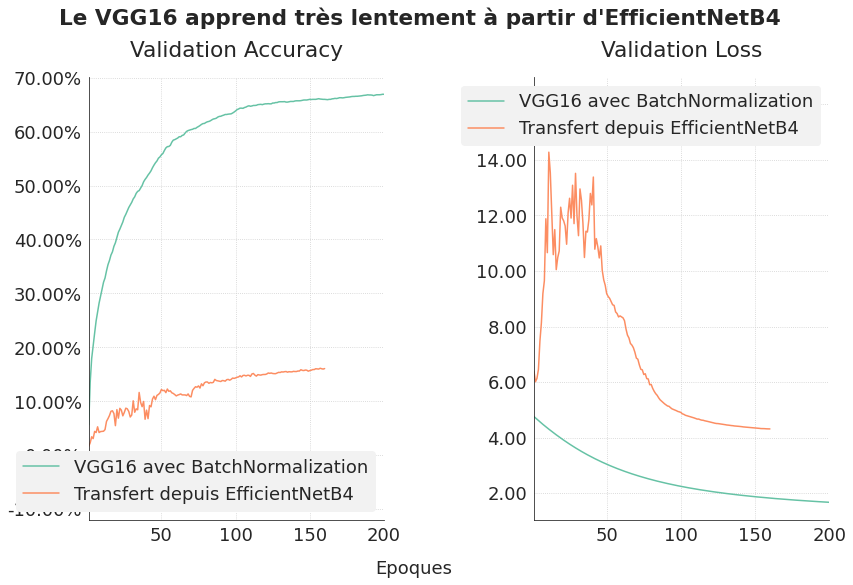

In [18]:
fig, ax = graph_analysis_both("Le VGG16 apprend très lentement à partir d'EfficientNetB4",
                              hist_baseline, hist_method,
                              "VGG16 avec BatchNormalization", "Transfert depuis EfficientNetB4",
                              ymin_acc=-0.12, ymax_loss=17, es_patience=0)
save_fig("Graph_reseau_vgg")
plt.show()